Preparing Dataset for Classification Model by Calculating Technical Indicators

In [351]:
#Libraries
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Scraping Dataset from Yahoo Finance using yfinance

In [352]:

#Getting data for the Apple Stock
aapl = yf.Ticker("AAPL")

# Apple Company Information
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [353]:
# Apple's Historical Stock Prices
# Get historical market data
aapl.dataset = aapl.history(period="10y")

#Tail Of Dataset
aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0


In [354]:
#Head of Dataset
aapl.dataset.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-04-20,18.085125,18.184209,17.444142,17.522430,1030985200,0.0,0.0
2012-04-23,17.449946,17.635268,17.022114,17.483278,966529200,0.0,0.0
2012-04-24,17.205297,17.360649,16.972574,17.134043,1076149200,0.0,0.0
2012-04-25,18.827022,18.899193,18.532219,18.654543,905777600,0.0,0.0
2012-04-26,18.785122,18.797967,18.413866,18.584204,536068400,0.0,0.0


Stochastic Oscillator Indicator

In [355]:
# Calculating %K and %D
aapl.dataset['14-high'] = aapl.dataset['High'].rolling(14).max()
aapl.dataset['14-low'] = aapl.dataset['Low'].rolling(14).min()
aapl.dataset['%K'] = (aapl.dataset['Close'] - aapl.dataset['14-low'])*100/(aapl.dataset['14-high'] - aapl.dataset['14-low'])
aapl.dataset['%D'] = aapl.dataset['%K'].rolling(3).mean()

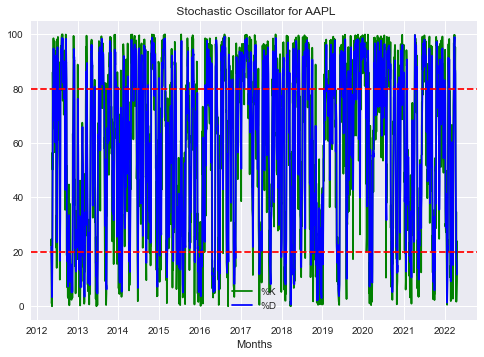

In [356]:
#Plotting SO Graph
plt.title(' Stochastic Oscillator for AAPL')
plt.xlabel('Months')
plt.plot(aapl.dataset['%K'], label='%K', c='g')
plt.plot(aapl.dataset['%D'], label='%D',  c='b')
plt.axhline(20, linestyle='--', color="r")
plt.axhline(80, linestyle="--", color="r")
plt.legend()
plt.show()


In [357]:
# Adding Buy/Sell Signals from Sotchastic Oscillator Indicator
def categorise_so(row):  
    if row['%K'] <= 20 and row['%D'] <= 20:
        return 'Buy'
    elif row['%K'] >= 80 and  row['%D']>= 80:
        return 'Sell'
    else:
        return 'Hold'

    
   
aapl.dataset['SO Indicator'] = aapl.dataset.apply(lambda row: categorise_so(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator
Date,,,,,,,,,,,,
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy


In [358]:
# Distrubition of the Indicator
print(aapl.dataset['SO Indicator'].value_counts())

Hold    1550
Sell     725
Buy      241
Name: SO Indicator, dtype: int64


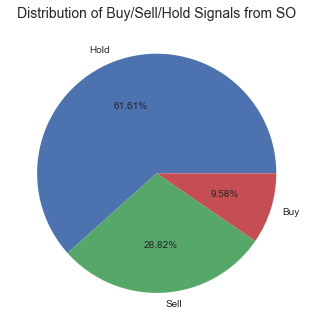

In [359]:
#Distrubition of the Indicator
labels = ["Hold", "Sell", "Buy"]
values = aapl.dataset['SO Indicator'].value_counts().tolist()
plt.style.use("seaborn")
plt.pie(x=values, labels=labels, autopct="%1.2f%%")
plt.title("Distribution of Buy/Sell/Hold Signals from SO", fontdict={'fontsize': 14})
plt.show()

Relative Strength Index (RSI)

In [360]:
#Calculating the RSI

delta = aapl.dataset['Close'].diff()
close_up = delta.clip(lower=0)
close_down = -1*delta.clip(upper=0)
ema_up = close_up.ewm(com=13, adjust=False).mean()
ema_down =  close_down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

#Adding RSI Column
aapl.dataset['RSI'] = 100 - (100/(1 + rs))


aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI
Date,,,,,,,,,,,,,
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy,44.009227
2022-04-19,165.020004,167.820007,163.910004,167.399994,63652587,0.0,0.0,179.610001,163.570007,23.877732,11.648403,Hold,47.682943


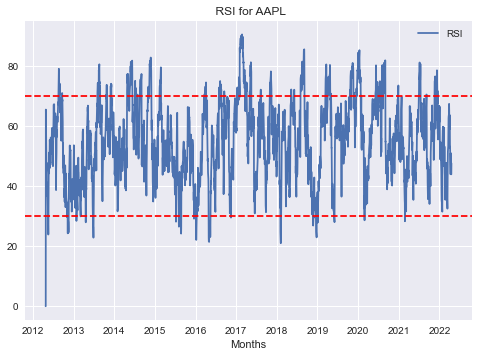

In [361]:
#Plotting RSI Graph
plt.title(' RSI for AAPL')
plt.xlabel('Months')
plt.plot(aapl.dataset['RSI'], label='RSI')
plt.axhline(30, linestyle='--', color="r")
plt.axhline(70, linestyle="--", color="r")
plt.legend()
plt.show()



In [362]:
# Adding Buy/Sell Signals from RSI Indicator
def categorise_rsi(row):  
    if row['RSI'] <= 30:
        return 'Buy'
    elif row['RSI'] >= 70:
        return 'Sell'
    else:
        return 'Hold'

    
   
aapl.dataset['RSI Indicator'] = aapl.dataset.apply(lambda row: categorise_rsi(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator
Date,,,,,,,,,,,,,,
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold,57.849501,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold,52.802034,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold,53.223866,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold,50.038901,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy,44.009227,Hold


In [363]:
# Distrubition of the Indicator
print(aapl.dataset['RSI Indicator'].value_counts())

Hold    2087
Sell     362
Buy       67
Name: RSI Indicator, dtype: int64


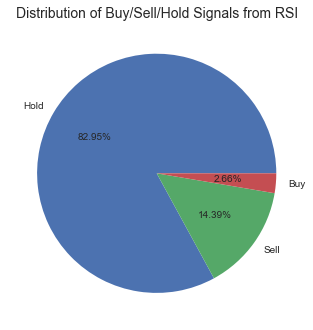

In [364]:
#Distrubition of the Indicator
labels = ["Hold", "Sell", "Buy"]
values = aapl.dataset['RSI Indicator'].value_counts().tolist()
plt.style.use("seaborn")
plt.pie(x=values, labels=labels, autopct="%1.2f%%")
plt.title("Distribution of Buy/Sell/Hold Signals from RSI", fontdict={'fontsize': 14})
plt.show()

Bollinger Bands

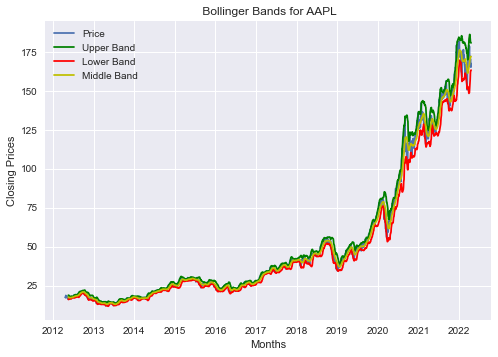

In [365]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    # SMA for 20 Days (Middle Band)
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()

    # Calculating Upper Band
    bollinger_upper = sma + (std * 2 )

    # Calculate Lower Band
    bollinger_lower = sma - (std * 2 )

    #Middle Band
    bollinger_middle = sma
    return bollinger_upper, bollinger_lower, bollinger_middle


closing_prices = aapl.dataset['Close']
bollinger_upper, bollinger_lower, bollinger_middle = get_bollinger_bands(closing_prices)

#Plotting the  Bollinger Bands
plt.title(' Bollinger Bands for AAPL')
plt.xlabel('Months')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Price')
plt.plot(bollinger_upper, label='Upper Band', c='g')
plt.plot(bollinger_lower, label='Lower Band', c='r')
plt.plot(bollinger_middle, label='Middle Band', c='y')

plt.legend()
plt.show()

In [366]:
#Adding Bollinger Bands to the Dataset
aapl.dataset['Bollinger_Upper'] = bollinger_upper
aapl.dataset['Bollinger_Lower'] = bollinger_lower

aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,Bollinger_Upper,Bollinger_Lower
Date,,,,,,,,,,,,,,,,
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold,182.360489,159.600514
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold,181.572397,161.469606
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold,180.917334,162.591668
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy,44.009227,Hold,180.788256,162.829748
2022-04-19,165.020004,167.820007,163.910004,167.399994,63652587,0.0,0.0,179.610001,163.570007,23.877732,11.648403,Hold,47.682943,Hold,180.626370,163.193633


In [367]:
# Adding Buy/Sell Signals from Bollinger Bands Indicator
def categorise_bollinger(row):  
    if row['Close'] < row['Bollinger_Lower']:
        return 'Buy'
    elif row['Close'] > row['Bollinger_Upper']:
        return 'Sell'
    else:
        return 'Hold'
    
   
aapl.dataset['Bollinger Indicator'] = aapl.dataset.apply(lambda row: categorise_bollinger(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,Bollinger_Upper,Bollinger_Lower,Bollinger Indicator
Date,,,,,,,,,,,,,,,,,
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold,57.849501,Hold,185.531431,149.873570,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold,52.802034,Hold,185.919297,150.373705,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold,53.223866,Hold,186.083449,151.571553,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold,50.038901,Hold,185.525972,153.665030,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566,Hold,183.719099,156.984903,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold,182.360489,159.600514,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold,181.572397,161.469606,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold,180.917334,162.591668,Hold
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy,44.009227,Hold,180.788256,162.829748,Hold


In [368]:
# Distrubition of the Indicator
print(aapl.dataset['Bollinger Indicator'].value_counts())

Hold    2218
Sell     188
Buy      110
Name: Bollinger Indicator, dtype: int64


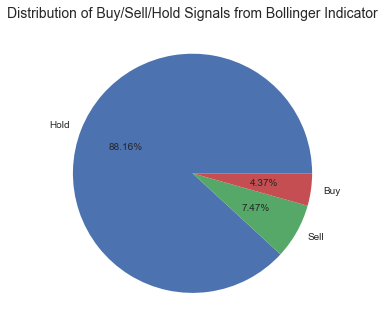

In [369]:
#Distrubition of the Indicator
labels = ["Hold", "Sell", "Buy"]
values = aapl.dataset['Bollinger Indicator'].value_counts().tolist()
plt.style.use("seaborn")
plt.pie(x=values, labels=labels, autopct="%1.2f%%")
plt.title("Distribution of Buy/Sell/Hold Signals from Bollinger Indicator", fontdict={'fontsize': 14})
plt.show()

Moving Average Convergence Divergence (MACD)

In [370]:
# Calculating the MACD Line and the Signal Line
ema12 = aapl.dataset['Close'].ewm(span=12, adjust=False).mean()
ema26 = aapl.dataset['Close'].ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()


#Appeding the MACD and Signal Data to Dataset
aapl.dataset['MACD'] = macd
aapl.dataset['Signal'] = signal
aapl.dataset.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,Bollinger_Upper,Bollinger_Lower,Bollinger Indicator,MACD,Signal
Date,,,,,,,,,,,,,,,,,,,
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold,182.360489,159.600514,Hold,1.157672,2.041307
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold,181.572397,161.469606,Hold,1.036860,1.840418
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold,180.917334,162.591668,Hold,0.522754,1.576885
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy,44.009227,Hold,180.788256,162.829748,Hold,0.096459,1.280800
2022-04-19,165.020004,167.820007,163.910004,167.399994,63652587,0.0,0.0,179.610001,163.570007,23.877732,11.648403,Hold,47.682943,Hold,180.626370,163.193633,Hold,-0.052764,1.014087


In [371]:
# Adding Buy/Sell Signals from MACD
signal = []

for i in range(len(aapl.dataset)):
   if aapl.dataset['MACD'][i] > aapl.dataset['Signal'][i] and aapl.dataset['MACD'][i-1] < aapl.dataset['Signal'][i-1]:
      signal.append('Buy')
   elif aapl.dataset['MACD'][i] < aapl.dataset['Signal'][i] and aapl.dataset['MACD'][i-1] > aapl.dataset['Signal'][i-1]:
      signal.append('Sell')
   else:
      signal.append('Hold')

  
    
aapl.dataset['MACD Indicator'] = signal



    


aapl.dataset.tail(10) 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,Bollinger_Upper,Bollinger_Lower,Bollinger Indicator,MACD,Signal,MACD Indicator
Date,,,,,,,,,,,,,,,,,,,,
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold,57.849501,Hold,185.531431,149.873570,Hold,3.349644,2.273907,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold,52.802034,Hold,185.919297,150.373705,Hold,2.990208,2.417167,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold,53.223866,Hold,186.083449,151.571553,Hold,2.699250,2.473583,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold,50.038901,Hold,185.525972,153.665030,Hold,2.276998,2.434266,Sell
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566,Hold,183.719099,156.984903,Hold,1.574015,2.262216,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold,182.360489,159.600514,Hold,1.157672,2.041307,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold,181.572397,161.469606,Hold,1.036860,1.840418,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold,180.917334,162.591668,Hold,0.522754,1.576885,Hold
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,15.264859,Buy,44.009227,Hold,180.788256,162.829748,Hold,0.096459,1.280800,Hold


In [372]:
# Distrubition of the Indicator
print(aapl.dataset['MACD Indicator'].value_counts())

Hold    2340
Buy       88
Sell      88
Name: MACD Indicator, dtype: int64


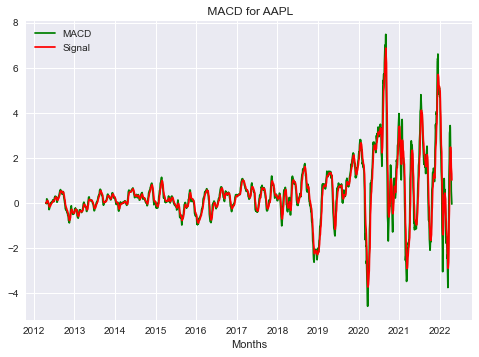

In [373]:

#Plotting the MACD
plt.title(' MACD for AAPL')
plt.xlabel('Months')
plt.plot(aapl.dataset['MACD'],  label='MACD', color='g')
plt.plot(aapl.dataset['Signal'], label='Signal', color='r')
plt.legend()
plt.show()

In [374]:
# Recommender Based on the three indicators
def recommender(row): 
    # If All Share the Same Signal OutPut That Signal (Buy)
    if row['RSI Indicator'] == "Buy" and row['SO Indicator'] == 'Buy' and  row['Bollinger Indicator'] == 'Buy':
        return 'Buy'
     # If Any 2 Indicators Share the Same Signal Output That Signal (buy)
    elif row['RSI Indicator'] == 'Buy' and row['SO Indicator'] == 'Buy':
        return 'Buy'
    elif row['RSI Indicator'] == 'Buy' and row['Bollinger Indicator'] == 'Buy':
        return 'Buy'
    elif row['SO Indicator'] == 'Buy' and row['Bollinger Indicator'] == 'Buy':
        return 'Buy'   
    # If All Share the Same Signal Output That Signal (Sell)
    elif row['RSI Indicator'] == 'Sell' and row['SO Indicator'] == 'Sell' and  row['Bollinger Indicator'] == 'Sell':
        return 'Sell'
    # If Any 2 Indicators Share the Same Signal Output That Signal (Sell)
    elif row['RSI Indicator'] == 'Sell' and row['SO Indicator'] == 'Sell':
        return 'Sell'
    elif row['RSI Indicator'] == 'Sell' and row['Bollinger Indicator'] == 'Sell':
        return 'Sell'
    elif row['SO Indicator'] == 'Sell' and row['Bollinger Indicator'] == 'Sell':
        return 'Sell'    
    # If All Share the Same Signal OutPut That Signal (Hold)
    elif row['RSI Indicator'] == 'Hold' and row['SO Indicator'] == 'Hold' and  row['Bollinger Indicator'] == 'Hold':
        return 'Hold'
    # If Any 2 Indicators Share the Same Signal Output That Signal (Hold)
    elif row['RSI Indicator'] == 'Hold' and row['SO Indicator'] == 'Hold':
        return 'Hold'
    elif row['RSI Indicator'] == 'Hold' and row['Bollinger Indicator'] == 'Hold':
        return 'Hold'
    elif row['SO Indicator'] == 'Hold' and row['Bollinger Indicator'] == 'Hold':
        return 'Hold'      
    else:
        return 'Unclassed'

aapl.dataset['Recommender'] = aapl.dataset.apply(lambda row: recommender(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,...,SO Indicator,RSI,RSI Indicator,Bollinger_Upper,Bollinger_Lower,Bollinger Indicator,MACD,Signal,MACD Indicator,Recommender
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,...,Hold,57.849501,Hold,185.531431,149.873570,Hold,3.349644,2.273907,Hold,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,...,Hold,52.802034,Hold,185.919297,150.373705,Hold,2.990208,2.417167,Hold,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,...,Hold,53.223866,Hold,186.083449,151.571553,Hold,2.699250,2.473583,Hold,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,...,Hold,50.038901,Hold,185.525972,153.665030,Hold,2.276998,2.434266,Sell,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,...,Hold,44.031566,Hold,183.719099,156.984903,Hold,1.574015,2.262216,Hold,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,...,Buy,47.044665,Hold,182.360489,159.600514,Hold,1.157672,2.041307,Hold,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,...,Hold,51.110807,Hold,181.572397,161.469606,Hold,1.036860,1.840418,Hold,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,...,Buy,44.281839,Hold,180.917334,162.591668,Hold,0.522754,1.576885,Hold,Hold
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0,179.610001,163.570007,9.351625,...,Buy,44.009227,Hold,180.788256,162.829748,Hold,0.096459,1.280800,Hold,Hold


In [375]:
# Distrubition of the Recommender
print(aapl.dataset['Recommender'].value_counts())

Hold    2014
Sell     389
Buy      113
Name: Recommender, dtype: int64


In [376]:
#Cleaned Up Dataset Including Date, Closing Price and the Indicators
cleaned_datase = aapl.dataset[['Close', 'RSI Indicator', 'SO Indicator', 'Bollinger Indicator', 'Recommender']].copy()
cleaned_datase.tail()

,Close,RSI Indicator,SO Indicator,Bollinger Indicator,Recommender
Date,,,,,
2022-04-12,167.660004,Hold,Buy,Hold,Hold
2022-04-13,170.399994,Hold,Hold,Hold,Hold
2022-04-14,165.289993,Hold,Buy,Hold,Hold
2022-04-18,165.070007,Hold,Buy,Hold,Hold
2022-04-19,167.399994,Hold,Hold,Hold,Hold
